In [1]:
import pandas as pd

In [2]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.1'

In [3]:
from konlpy.tag import Okt
okt = Okt() # 객체 생성

In [4]:
from konlpy.tag import Twitter 
from collections import Counter

In [73]:
final = pd.read_csv('./data/중복제거_전처리완료.csv')

In [74]:
final.head()

,title,genre
0,우리 사랑하게 됐어요.,['댄스']
1,너 때문에,['댄스']
2,Bo Peep Bo Peep,['댄스']
3,오늘 헤어졌어요,['발라드']
4,처음처럼 그때처럼,['발라드']


In [75]:
# final = final[['title','genre']]

In [76]:
# final.to_csv('final_genre.csv', index = False)

In [77]:
final.shape

(6489, 2)

# 1. 발라드

In [78]:
# 발라드 = final[final['genre'] == '발라드']
발라드 = final[final['genre'].str.contains('발라드')]

In [79]:
발라드

,title,genre
3,오늘 헤어졌어요,['발라드']
4,처음처럼 그때처럼,['발라드']
5,술 한잔 해요,['발라드']
12,그녀처럼,['발라드']
15,사랑 참...,['발라드']
...,...,...
6474,5월의 밤,['발라드']
6475,이별주,['발라드']
6477,축제,"['발라드', '인디음악']"
6481,이 번호로 전화해줘,['발라드']


In [80]:
발라드 = 발라드['title']

In [81]:
발라드.to_csv('중복허용_발라드.txt', index = False)

# 텍스트 파일 불러오기

In [15]:
file = open("중복제거_발라드.txt", 'r') 
lists = file.readlines() 
file.close() 
lists

['오늘 헤어졌어요\n',
 '처음처럼 그때처럼 \n',
 '술 한잔 해요\n',
 '그녀처럼\n',
 '사랑 참...\n',
 'Love Story\n',
 '사랑하면 안되나요\n',
 '잊지 말아요\n',
 '넌 나를 왜 \n',
 '그대라서\n',
 '사랑합니다\n',
 '못된 여자 II \n',
 '꿈을 꾸다 \n',
 '그립고 그립고 그립다\n',
 'Ghost (고스트)\n',
 '사랑경보 \n',
 '부른다\n',
 '돌아올순 없나요\n',
 '어젠 \n',
 '사랑눈 \n',
 '여자는 나쁜남자를 좋아한다\n',
 '실화\n',
 '눈물아 안녕\n',
 '웨딩드레스 (Wedding Dress)\n',
 '사랑비\n',
 '축가 (祝歌)\n',
 '낙인\n',
 '사랑한 후에\n',
 '하모니\n',
 '사랑하면 안 되니\n',
 '한번쯤은\n',
 '이별은 사랑 뒤를 따라와\n',
 '悲談 (비담) (슬픈 이야기)\n',
 '너에게 약속하는 7가지\n',
 '코끝이 짠하잖아요\n',
 '내 안을 뜨겁게 채운 사람은 너야\n',
 '나쁜사람\n',
 '사랑 둘이서..\n',
 '너를 사랑해\n',
 '"미안해, 사랑해서..."\n',
 '듣죠... 그대를\n',
 '사랑을 잊다\n',
 'I Love You\n',
 'I Cry \n',
 '사랑인걸요\n',
 'Good Bye\n',
 '사랑이 그렇습니다\n',
 '첫사랑이죠\n',
 '희재 Part.2\n',
 '잘해 주지 마요\n',
 '남잔 다 그래\n',
 '자기밖에\n',
 '사랑해\n',
 '하루가 \n',
 '또르르\n',
 'Baby Baby\n',
 '죽어도 못 보내\n',
 '사랑이 술을 가르쳐 \n',
 '못해 \n',
 '웃어 줄 수 없어서 미안하다\n',
 '우리 결혼할까?\n',
 'I Love You \n',
 '사랑살이\n',
 '귀여운 넌\n',
 '멍청이\n',
 '죽을 것 같아\n',
 '눈물아 제발 멈춰줘 \n',
 '흐노니\n',
 '해바라기 \n',
 '꿈에

# 형태소 나누기

In [16]:
twitter = Twitter()
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

# 명사, 형용사, 부사만 골라내기

In [17]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 
            
print(noun_adj_adv_list)


['오늘', '처음처럼', '그때', '술', '한잔', '해', '그녀', '사랑', '사랑', '넌', '왜', '그대', '사랑', '여자', '꿈', '고스트', '사랑', '경보', '순', '어젠', '사랑', '눈', '여자', '실화', '눈물', '안녕', '웨딩드레스', '사랑비', '축가', '낙인', '사랑', '후', '하모니', '사랑', '안', '한번', '이별', '사랑', '뒤', '비담', '이야기', '너', '약속', '가지', '코끝', '안', '채운', '사람', '너', '사랑', '둘이서', '너', '사랑', '사랑', '그대', '사랑', '사랑', '인걸', '사랑', '첫사랑', '희재', '주지', '마', '자기', '사랑', '하루', '또르르', '못', '사랑', '술', '줄', '우리', '결혼', '사랑', '살이', '넌', '멍청이', '죽', '눈물', '제발', '흐노', '해바라기', '꿈', '추억', '만들기', '눈물', '솜사탕', '가슴', '남자', '이', '사람', '별별', '날개', '운명', '너', '카라멜', '커피', '새로고침', '사랑', '은지원', '후', '두둑', '사랑', '드라마', '산부인과', '삽입곡', '가시리', '이별', '사랑', '마음', '다한', '사랑', '작년', '겨울', '사랑', '때문', '길', '사랑', '어도', '우리', '하루', '손가락', '우리', '다시', '미아', '너', '드라마', '파스타', '삽입곡', '널', '위', '멜로디', '사랑', '사랑', '선물', '사랑', '요', '사랑', '사람', '우리', '액터', '스', '초이스', '사람', '초연', '밤하늘', '별', '안녕', '사랑', '눈물', '슈퍼스타', '버릇', '이별이야기', '못', '눈물', '널', '노래', '그네', '너', '바보', '사랑', '음악', '여자', '담배', '빗물', '때', 

# 빈도수대로 정렬하기

In [18]:
count = Counter(noun_adj_adv_list)

In [19]:
words = dict(count.most_common())

In [20]:
words

{'사랑': 325,
 '너': 131,
 '그대': 76,
 '그': 58,
 '사람': 52,
 '이별': 45,
 '우리': 43,
 '날': 42,
 '눈물': 37,
 '이': 37,
 '밤': 34,
 '노래': 30,
 '니': 26,
 '여자': 25,
 '가슴': 24,
 '곡': 23,
 '안녕': 22,
 '남자': 22,
 '꿈': 21,
 '하루': 19,
 '다시': 19,
 '널': 19,
 '시간': 19,
 '길': 18,
 '바보': 18,
 '기억': 18,
 '오늘': 17,
 '별': 17,
 '바람': 17,
 '겨울': 15,
 '뭐': 15,
 '비': 15,
 '해': 14,
 '눈': 14,
 '그때': 13,
 '더': 13,
 '꽃': 13,
 '술': 12,
 '못': 12,
 '끝': 12,
 '일': 12,
 '또': 12,
 '봄': 12,
 '한번': 11,
 '이야기': 11,
 '마음': 11,
 '고백': 11,
 '처음': 11,
 '한잔': 10,
 '넌': 10,
 '마': 10,
 '난': 10,
 '당신': 10,
 '왜': 9,
 '세상': 9,
 '두': 9,
 '입술': 9,
 '그날': 9,
 '가을': 9,
 '안': 8,
 '뒤': 8,
 '약속': 8,
 '혼자': 8,
 '젠': 8,
 '놈': 8,
 '지금': 8,
 '편지': 8,
 '마지막': 8,
 '가지': 7,
 '삽입곡': 7,
 '사이': 7,
 '첫': 7,
 '위해': 7,
 '천국': 7,
 '최고': 7,
 '걸': 7,
 '맘': 7,
 '집': 7,
 '선물': 6,
 '요': 6,
 '이유': 6,
 '하늘': 6,
 '목소리': 6,
 '단': 6,
 '속': 6,
 '네': 6,
 '매일': 6,
 '러브': 6,
 '시': 6,
 '어제': 6,
 '거': 6,
 '중': 6,
 '가까이': 6,
 '어디': 6,
 '여름': 6,
 '그대만': 6,
 '알': 6,
 '봄날': 6,
 '곁

# 사랑,사람,너 제거

In [21]:
del words['사랑']
del words['사람']
del words['너']

# 워드 클라우드 만들기

In [22]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

import nltk 
from nltk.corpus import stopwords

In [23]:
%matplotlib inline 
import matplotlib
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 

set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)


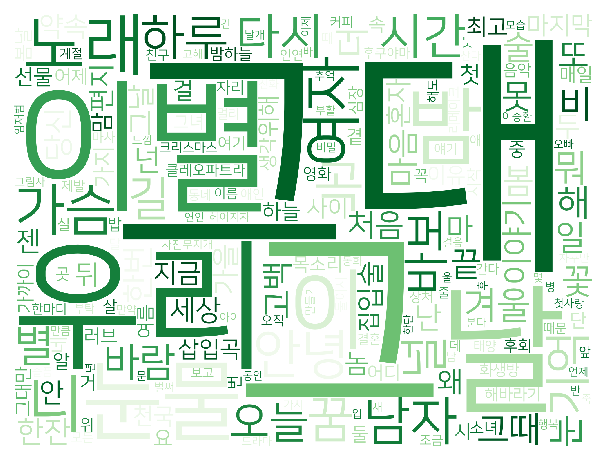

In [24]:
wordcloud = WordCloud(font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf', background_color='white',colormap = "Greens", width=2000, height=1500).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# 이미지를 입혀보아요

In [59]:
from PIL import Image
import numpy as np

In [60]:
alice_mask = np.array(Image.open("./alice_mask.png"))

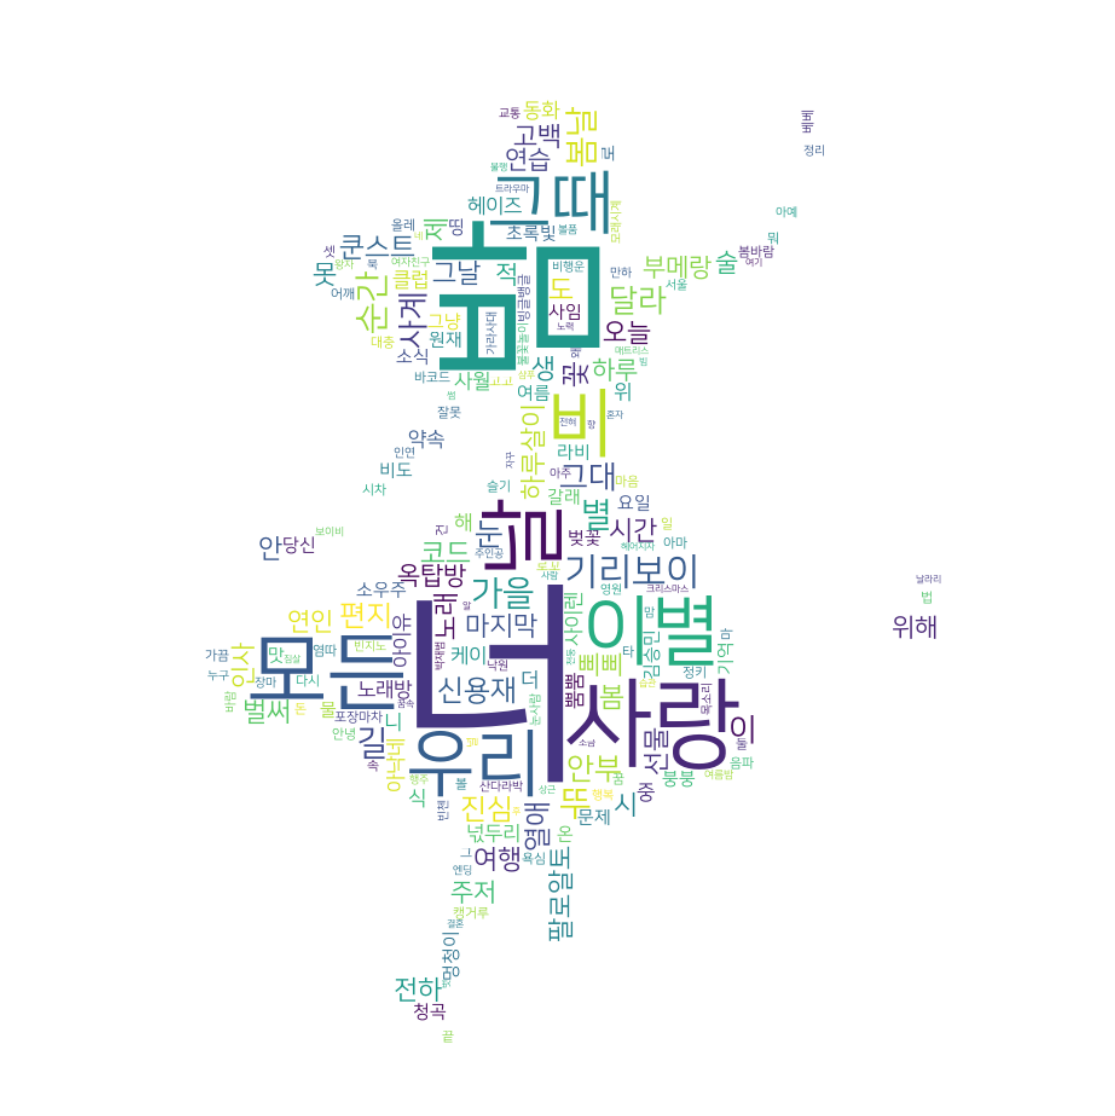

In [62]:
wordcloud = WordCloud(
    font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf',             
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask
).generate_from_frequencies(words) 

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()